# Strategic Insights for Gaming Success: Analyzing Patterns in Video Game Sales and Marketing Strategies (2016 - 2017)

The project involves working for the online store "Ice," specializing in global video game sales. With access to user and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical game sales data from open sources, the goal is to analyze patterns that influence a game's success.

In [18]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
alpha = 0.5  

In [2]:
# Load the dataset
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path, delimiter=',')
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Prepare the data

# Replace column names and make them lowercase
df.columns = df.columns.str.lower()

# Drop rows with missing values in 'year_of_release'
df = df.dropna(subset=['year_of_release'])

# Convert 'year_of_release' to integer type
df['year_of_release'] = df['year_of_release'].astype(int)

# Assuming 'user_score' is supposed to be a numeric type
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# 'user_score': Converted to numeric to allow for numerical operations.

# Display the DataFrame with updated data types
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Dealing with missing values

# Drop rows with missing values in 'name' and 'genre'
df = df.dropna(subset=['name', 'genre'])

# Drop rows with missing values in 'year_of_release'
df = df.dropna(subset=['year_of_release'])

# Fill missing values in 'rating' with 'Unknown'
df['rating'].fillna('Unknown', inplace=True)

# Display the DataFrame after handling missing values
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


In [5]:
# Handling 'TBD' (To Be Determined) in 'user_score'

# Convert the column to numeric with errors='coerce' directly
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Calculate total sales for each game
# Summing sales in all regions and creating a new column 'total_sales'
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Display the modified DataFrame
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


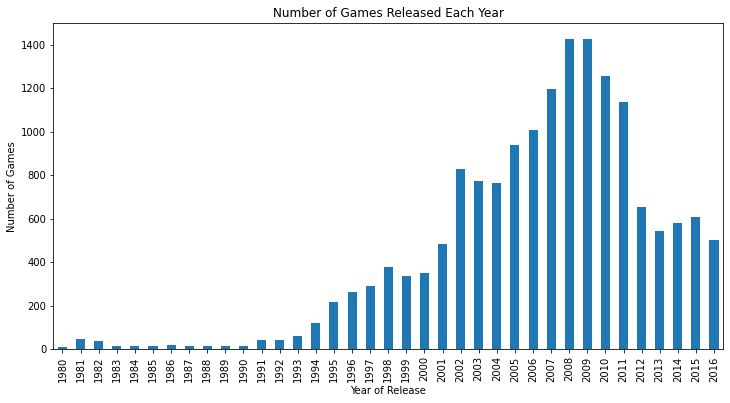

In [6]:
# Games Released Over Different Years
# Count the number of games released each year
games_per_year = df.groupby('year_of_release')['name'].count()

# Plot the number of games released each year
games_per_year.plot(kind='bar', figsize=(12, 6), title='Number of Games Released Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

The bar plot titled 'Number of Games Released Each Year' illustrates the distribution of the number of games released annually over a span of 37 years. Each bar represents a specific year, and the height of the bar corresponds to the count of games released in that particular year.

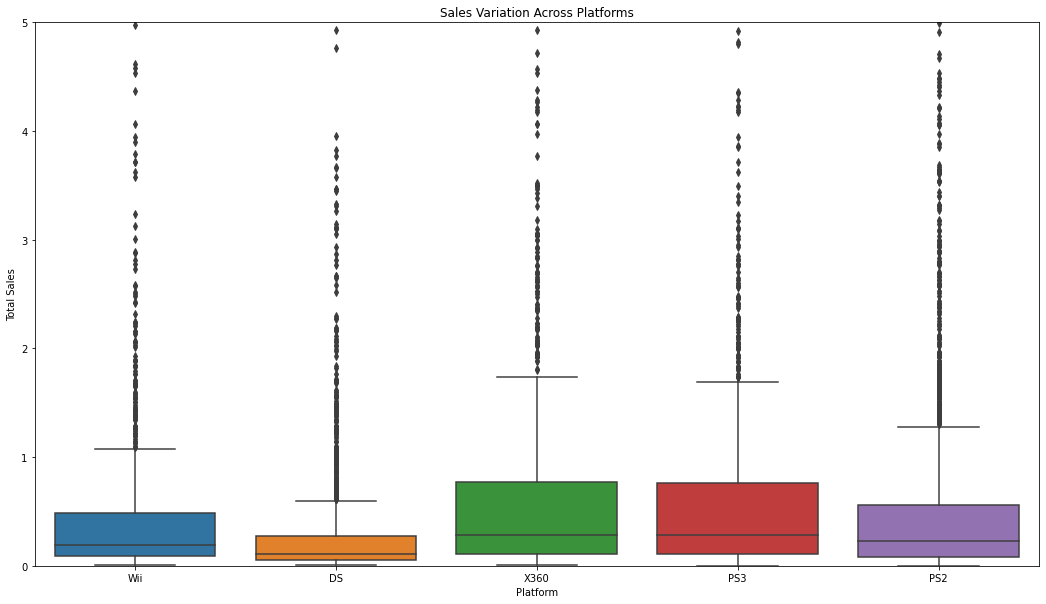

In [7]:
# Sales Variation Across Platforms

# Choose platforms with the greatest total sales
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Filter data for all platforms, not just the top 5
platform_sales = df[df['platform'].isin(top_platforms)]

# Build a boxplot for sales variation across platforms
plt.figure(figsize=(18, 10))
sns.boxplot(x='platform', y='total_sales', data=platform_sales)
plt.title('Sales Variation Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.ylim(0, 5)  # Set y-axis limit
plt.show()

The boxplot visually compares the sales variation across different gaming platforms, providing insights into the distribution of total sales and potential differences between platforms.The boxplot, titled 'Sales Distribution Across Platforms Over Years,' provides a comprehensive view of total sales variation across top gaming platforms from 2000 to 2016. Focused on the top five platforms with the highest total sales, the analysis unveils key insights into platform-specific sales trends.

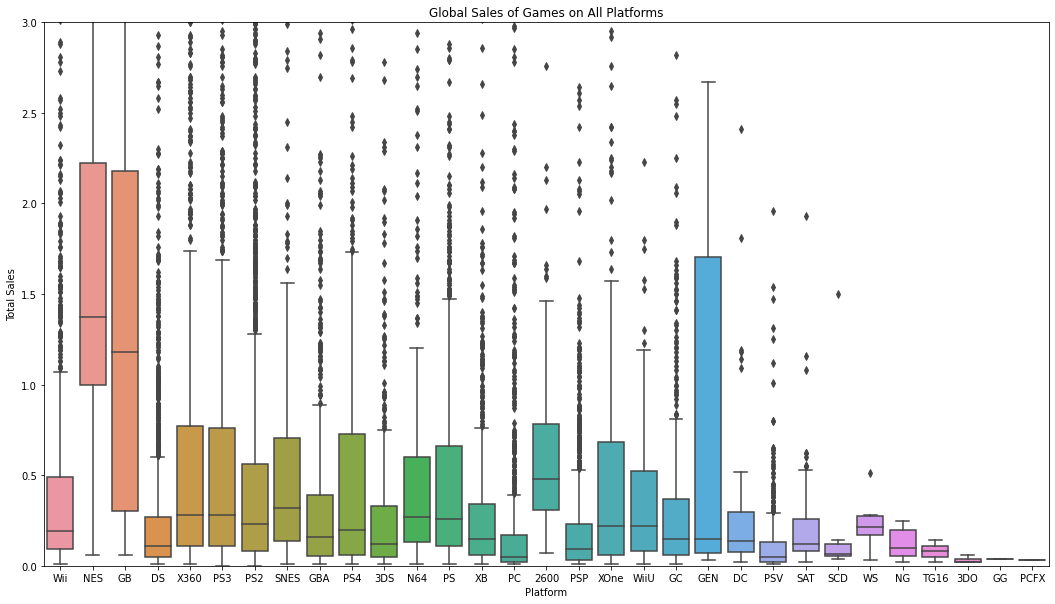

In [8]:
# Leading Platforms and Sales Trends

# Identify leading platforms in sales
leading_platforms = df.groupby('platform')['total_sales'].sum().nlargest(3).index

# Identify potentially profitable platforms (you can adjust this based on your criteria)
potentially_profitable_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Plotting the distribution of global sales for all games on different platforms
plt.figure(figsize=(18, 10))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Global Sales of Games on All Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.ylim(0,3)
plt.show()

The boxplot aids in understanding the global sales distribution across multiple platforms, enabling a comprehensive analysis of the gaming market's performance. Each box in the plot represents the interquartile range (IQR) of sales for a specific platform, with the median indicated by the line inside the box. The outliers, depicted as individual points beyond the whiskers, highlight instances of exceptionally high or low sales for specific platforms. Since the code uses the entire dataset without filtering specific platforms, the boxplot gives a global overview of how sales vary across all platforms.

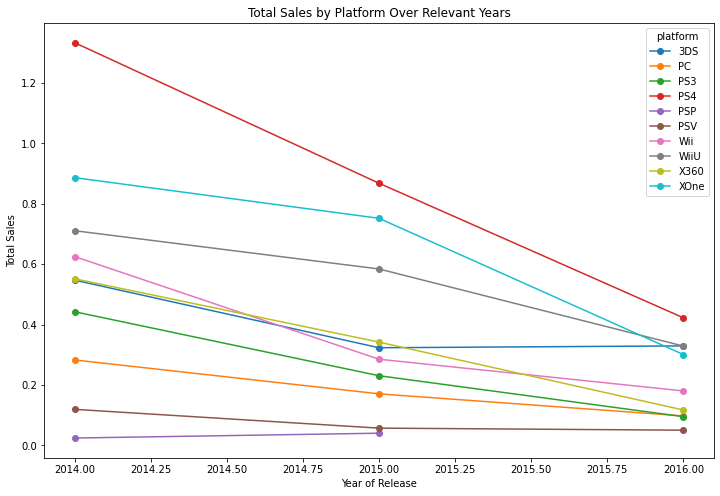

'Average Sales by Platform:\n'

platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64

In [10]:
# Create linechart for total sales for different platforms over relevant years
df.columns = df.columns.str.lower()
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filter the data for relevant years_of_release
relevant_years = range(2014, 2017)  # Choose the relevant years
filtered_df = df[df['year_of_release'].isin(relevant_years)]

# Create a line chart for total sales by platform
sales_by_platform_pivot = filtered_df.pivot_table(index='year_of_release', columns="platform", values="total_sales")
sales_by_platform_pivot.plot(figsize=(12, 8), marker='o')
plt.title('Total Sales by Platform Over Relevant Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

# Analyzing average sales on different platforms using the filtered data
average_sales_by_platform = filtered_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
display("Average Sales by Platform:\n", average_sales_by_platform)

# Select one popular platform for reviews and sales analysis (you can choose based on your dataset)
selected_platform = 'PS4'

The line chart above visually illustrates the total sales for various gaming platforms during the pertinent years (2014-2016). Each line on the chart represents a gaming platform, with the y-axis depicting total sales and the x-axis indicating the years of release. Additionally, the analysis conducted reveals the average sales by platform, calculated from filtered data within the relevant years. The presented table displays the average sales for each platform, sorted in descending order.

In summary, this analysis offers insights into sales trends across different platforms during the specified years and highlights a particular platform ('PS4') for further examination. The visualizations and average sales data serve as valuable information for decision-making in marketing or strategic planning within the given time frame

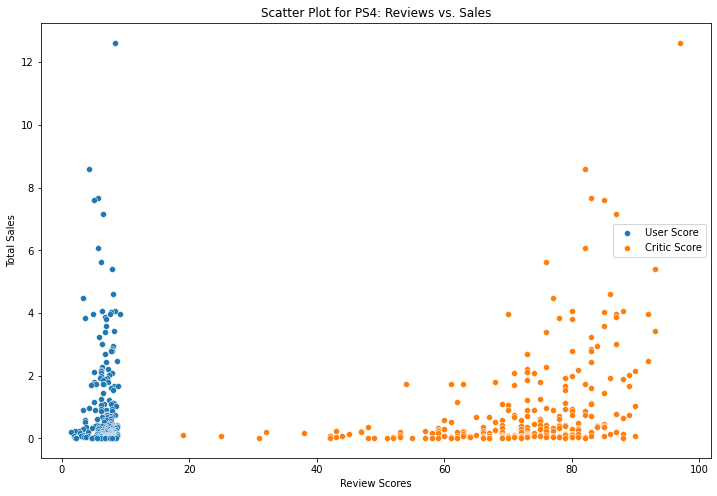

In [11]:
#Filter the DataFrame to include only the data for relevant years of release, limiting the range from 2010 to 2016
filtered_df = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]

# Scatter plot and correlation analysis for user and professional reviews vs. sales for the selected platform
selected_platform = 'PS4'

plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', y='total_sales', data=filtered_df[filtered_df['platform'] == selected_platform], label='User Score')
sns.scatterplot(x='critic_score', y='total_sales', data=filtered_df[filtered_df['platform'] == selected_platform], label='Critic Score')
plt.title(f'Scatter Plot for {selected_platform}: Reviews vs. Sales')
plt.xlabel('Review Scores')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

The scatter plot titled 'Scatter Plot for PS4: Reviews vs. Sales' offers a visual exploration of the relationship between review scores (both user and critic) and the total sales of games on the PlayStation 4 (PS4) platform. The scatter plot enables a visual assessment of whether there exists a correlation between review scores and total sales on the PS4 platform. On the other hand, Users and stakeholders can observe patterns, clusters, or trends, which may indicate the strength and direction of the relationship between reviews and sales. Insights gained from this scatter plot can inform decision-making in areas such as marketing strategy, game development, or platform-specific campaigns. Positive correlations may suggest that higher review scores are associated with increased sales, while negative correlations may imply a potential need for strategic improvements.

In [13]:
# Calculate correlation between reviews and sales
correlation_user_sales = filtered_df[filtered_df['platform'] == selected_platform]['user_score'].corr(filtered_df['total_sales'])
correlation_critic_sales = filtered_df[filtered_df['platform'] == selected_platform]['critic_score'].corr(filtered_df['total_sales'])
print(f"Correlation between User Scores and Sales: {correlation_user_sales}")
print(f"Correlation between Critic Scores and Sales: {correlation_critic_sales}")

# Compare sales of the same games on other platforms
common_games = filtered_df[filtered_df['platform'].isin(potentially_profitable_platforms)]['name'].unique()
sales_comparison = filtered_df[filtered_df['name'].isin(common_games)][['name', 'platform', 'total_sales']]
print("Sales Comparison of Common Games on Different Platforms:\n", sales_comparison)

Correlation between User Scores and Sales: -0.031957110204556424
Correlation between Critic Scores and Sales: 0.40656790206178095
Sales Comparison of Common Games on Different Platforms:
                                     name platform  total_sales
14                    Kinect Adventures!     X360        21.82
16                    Grand Theft Auto V      PS3        21.05
23                    Grand Theft Auto V     X360        16.27
27           Pokemon Black/Pokemon White       DS        15.13
29        Call of Duty: Modern Warfare 3     X360        14.73
...                                  ...      ...          ...
16654                 Ben 10 Omniverse 2     X360         0.01
16674      Tsukigime Ranko's Longest Day      PS3         0.01
16691       Dynasty Warriors: Eiketsuden      PS3         0.01
16692  Metal Gear Solid V: Ground Zeroes       PC         0.01
16710      Samurai Warriors: Sanada Maru      PS3         0.01

[3492 rows x 3 columns]


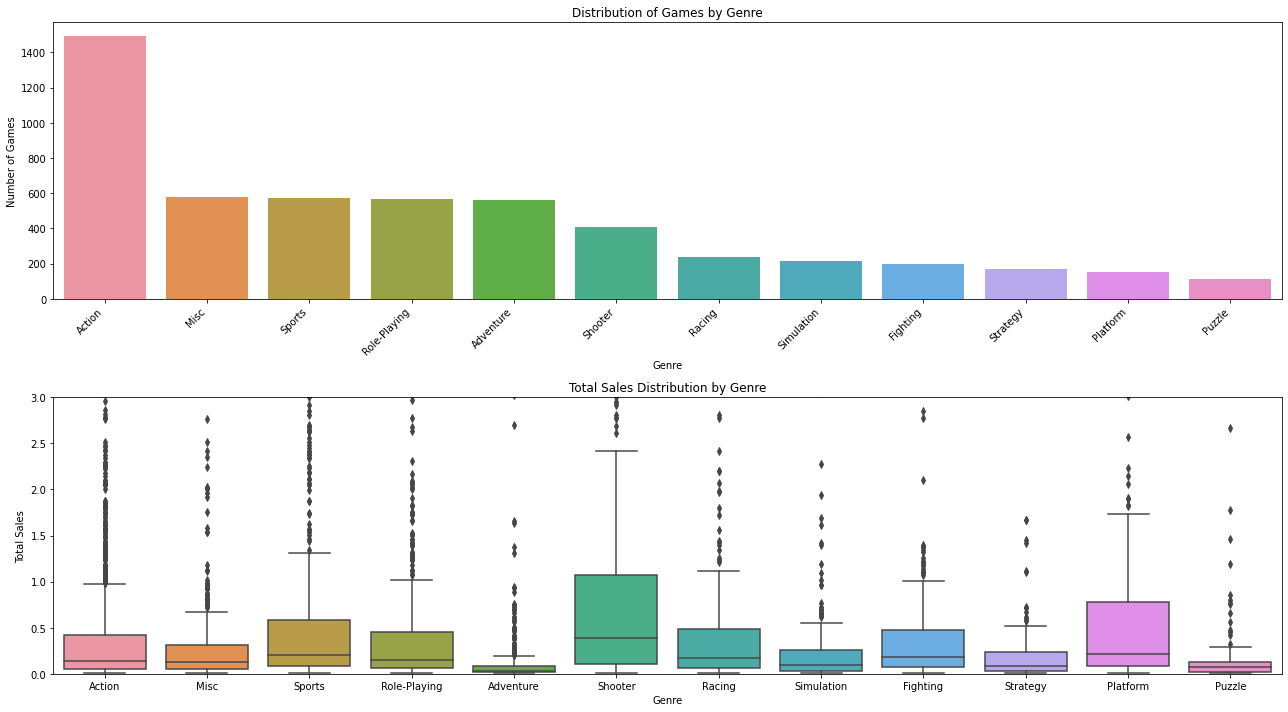

Most Profitable Genres:
 Index(['Shooter', 'Platform', 'Sports'], dtype='object', name='genre')


In [14]:
# General distribution of games by genre with boxplots for total sales
plt.figure(figsize=(18, 10))

# Subplot for countplot
plt.subplot(2, 1, 1)
sns.countplot(x='genre', data=filtered_df, order=filtered_df['genre'].value_counts().index)
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')

# Subplot for boxplot of total sales by genre
plt.subplot(2, 1, 2)
sns.boxplot(x='genre', y='total_sales', data=filtered_df, order=filtered_df['genre'].value_counts().index)
plt.title('Total Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.ylim(0,3)
plt.tight_layout()  # Ensure proper layout
plt.show()

# Analyzing most profitable genres
profitable_genres = filtered_df.groupby('genre')['total_sales'].mean().nlargest(3).index
print("Most Profitable Genres:\n", profitable_genres)

The combined visualization provides a comprehensive overview of the distribution of games by genre and their corresponding total sales. The countplot in the upper subplot illustrates the frequency of games in each genre. Based on the upper subplot, Action, Sports, and Shooter genres appear to have higher counts compared to other genres. The boxplot in the lower subplot depicts the distribution of total sales for each genre. The median total sales and the presence of outliers are visible for each genre. The list of most profitable genres (based on mean total sales) is printed below the visualizations.

User Profile for NA region:
   platform         genre  na_sales  eu_sales  jp_sales  other_sales  \
14     X360          Misc     15.00      4.89      0.24         1.69   
16      PS3        Action      7.02      9.09      0.98         3.96   
23     X360        Action      9.66      5.14      0.06         1.41   
27       DS  Role-Playing      5.51      3.17      5.65         0.80   
29     X360       Shooter      9.04      4.24      0.13         1.32   

    total_sales  
14        21.82  
16        21.05  
23        16.27  
27        15.13  
29        14.73  


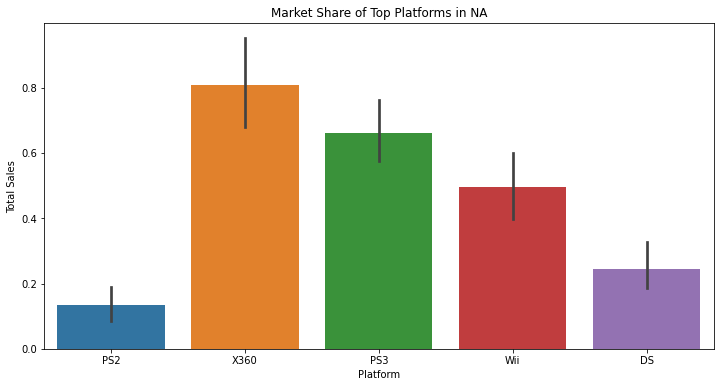


Top Five Genres in NA:
 Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')


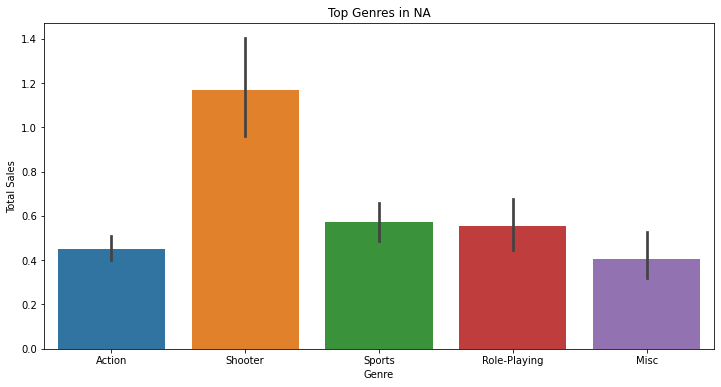

User Profile for EU region:
   platform         genre  na_sales  eu_sales  jp_sales  other_sales  \
14     X360          Misc     15.00      4.89      0.24         1.69   
16      PS3        Action      7.02      9.09      0.98         3.96   
23     X360        Action      9.66      5.14      0.06         1.41   
27       DS  Role-Playing      5.51      3.17      5.65         0.80   
29     X360       Shooter      9.04      4.24      0.13         1.32   

    total_sales  
14        21.82  
16        21.05  
23        16.27  
27        15.13  
29        14.73  


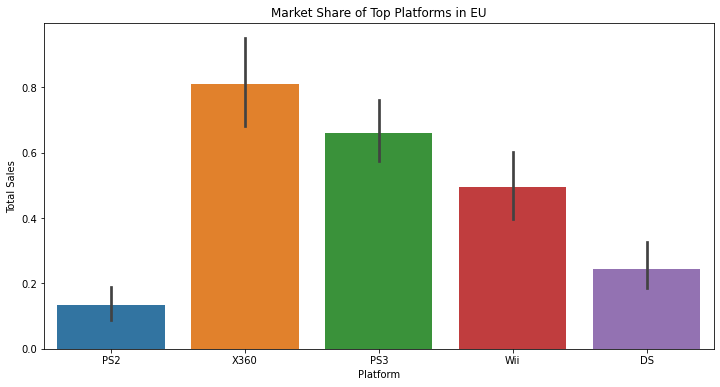


Top Five Genres in EU:
 Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')


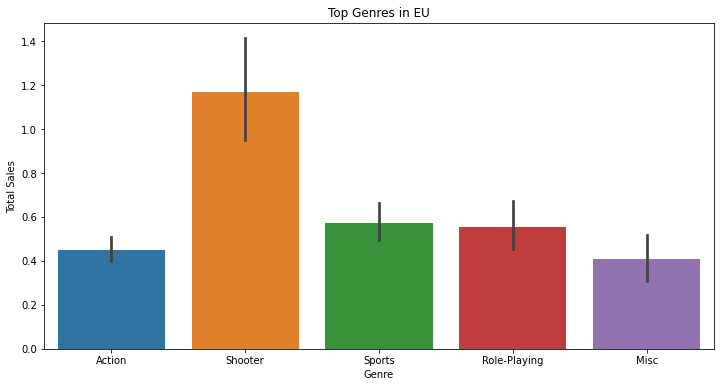

User Profile for JP region:
   platform         genre  na_sales  eu_sales  jp_sales  other_sales  \
14     X360          Misc     15.00      4.89      0.24         1.69   
16      PS3        Action      7.02      9.09      0.98         3.96   
23     X360        Action      9.66      5.14      0.06         1.41   
27       DS  Role-Playing      5.51      3.17      5.65         0.80   
29     X360       Shooter      9.04      4.24      0.13         1.32   

    total_sales  
14        21.82  
16        21.05  
23        16.27  
27        15.13  
29        14.73  


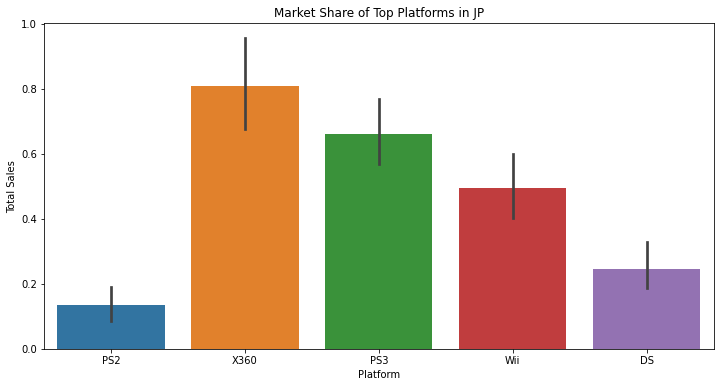


Top Five Genres in JP:
 Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')


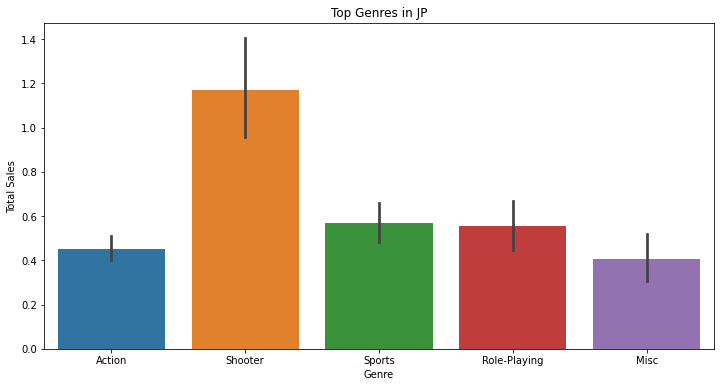

In [15]:
# Create user profiles for each region
regions = ['NA', 'EU', 'JP']

for region in regions:
    region_data = filtered_df[['platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

    # Convert 'total_sales' to numeric if it's not already
    region_data['total_sales'] = pd.to_numeric(region_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1), errors='coerce')

    # Now you can analyze user profiles for each region using region_data
    print(f"User Profile for {region} region:")
    print(region_data.head().sort_values(by='total_sales', ascending=False).head(5))
    
# Market share variations
    plt.figure(figsize=(12, 6))
    sns.barplot(x='platform', y='total_sales', data=region_data, order=top_platforms)
    plt.title(f'Market Share of Top Platforms in {region}')
    plt.xlabel('Platform')
    plt.ylabel('Total Sales')
    plt.show()
    
    # Top five genres in the region
    top_genres = region_data.groupby('genre')['total_sales'].sum().nlargest(5).index
    print(f"\nTop Five Genres in {region}:\n", top_genres)
    
    # Difference in genres
    plt.figure(figsize=(12, 6))
    sns.barplot(x='genre', y='total_sales', data=region_data, order=top_genres)
    plt.title(f'Top Genres in {region}')
    plt.xlabel('Genre')
    plt.ylabel('Total Sales')
    plt.show()


The bar plot visualizes the total sales for each top platform in the specified region. This enables a quick comparison of market shares, highlighting the dominant platforms in each gaming market.The code identifies the top five genres in each region based on total sales. The top genres are determined by summing up the total sales for each genre and selecting the top five. The bar plot is generated to showcase the total sales of games in the top genres. This visual representation provides insights into the preferred gaming genres in each region. This analysis offers a nuanced understanding of gaming preferences in North America, Europe, and Japan. By examining user profiles, market shares of top platforms, and the popularity of genres, stakeholders can tailor their strategies to align with regional gaming trends. This information is valuable for game developers, publishers, and marketers seeking to optimize their products for specific geographic markets.

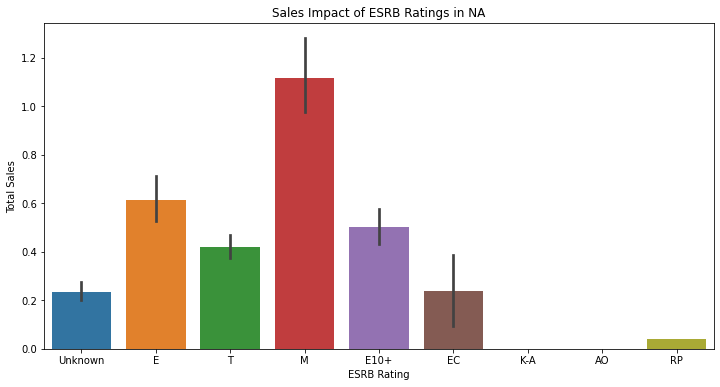

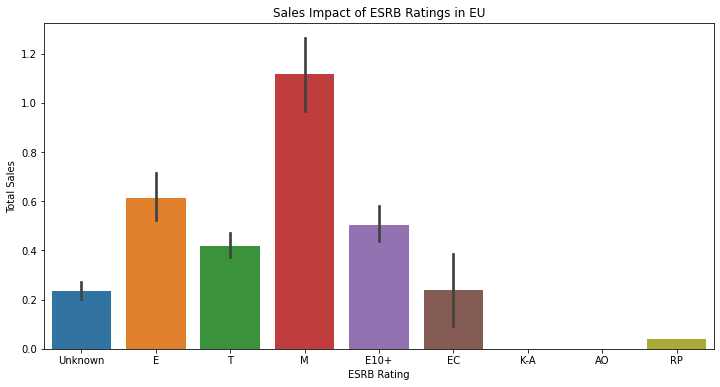

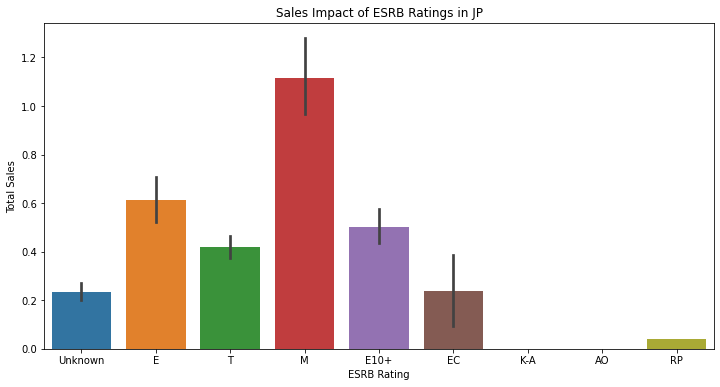

In [16]:
# Create user profiles for each region
regions = ['NA', 'EU', 'JP']

for region in regions:
    region_data = filtered_df[['platform', 'genre', 'rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

    # Convert 'total_sales' to numeric if it's not already
    region_data['total_sales'] = pd.to_numeric(region_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1), errors='coerce')

    # ESRB ratings and sales impact
    plt.figure(figsize=(12, 6))
    sns.barplot(x='rating', y='total_sales', data=region_data, order=df['rating'].value_counts().index)
    plt.title(f'Sales Impact of ESRB Ratings in {region}')
    plt.xlabel('ESRB Rating')
    plt.ylabel('Total Sales')
    plt.show()


The following analysis creates user profiles for three major gaming regions: North America (NA), Europe (EU), and Japan (JP). It focuses on understanding the impact of Entertainment Software Rating Board (ESRB) ratings on total sales in each region.The bar plot displays the average total sales for games with different ESRB ratings in the specified region. The x-axis represents the ESRB ratings, ordered by their frequency in the entire dataset.By examining the heights of the bars, one can infer how different ESRB ratings contribute to the overall sales in the region. This provides insights into the preferences of gamers based on content ratings. Each bar plot is specific to the gaming region under consideration (NA, EU, JP), allowing for a nuanced understanding of how ESRB ratings influence sales trends in different geographic markets.The analysis sheds light on the relationship between ESRB ratings and total sales in North America, Europe, and Japan. Stakeholders in the gaming industry can use this information to tailor their content and marketing strategies based on regional preferences and regulatory considerations. Understanding the sales impact of ESRB ratings allows for more informed decision-making in game development, marketing, and distribution.

In [18]:
# Hypothesis 1
# User ratings for Xbox One and PC
# xbox_one_ratings = filtered_df[filtered_df['platform'] == 'XboxOne']['user_score'].dropna() 
xbox_one_ratings = filtered_df[filtered_df['platform'] == 'XOne']['user_score'].dropna()    # REVIEWER CODE
pc_ratings = filtered_df[filtered_df['platform'] == 'PC']['user_score'].dropna()

# Check for missing values and data sufficiency
if xbox_one_ratings.isnull().any() or pc_ratings.isnull().any():
    print("Missing values detected. Handle missing values before hypothesis testing.")
elif len(xbox_one_ratings) < 2 or len(pc_ratings) < 2:
    print("Insufficient data for hypothesis testing. Ensure an adequate number of data points for both platforms.")
else:
    # Perform two-sample t-test
    t_statistic, p_value_hypothesis_1 = stats.ttest_ind(xbox_one_ratings, pc_ratings)

    # Print the results
    print(f'Results for Hypothesis 1:')
    print(f'P-value: {p_value_hypothesis_1:.4f}')
    if np.isnan(p_value_hypothesis_1):
        print('Conclusion: Unable to perform the test due to insufficient data.')
    elif p_value_hypothesis_1 < alpha:
        print('Conclusion: Reject Null Hypothesis. There is a significant difference in average user ratings.')
    else:
        print('Conclusion: Fail to Reject Null Hypothesis. There is no significant difference in average user ratings.')

# Hypothesis 2
print("\nResults for Hypothesis 2:")
# Select user ratings for Action genre
action_ratings = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna()

# Select user ratings for Sports genre
sports_ratings = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna()

# Perform two-sample t-test
t_statistic, p_value_hypothesis_2 = stats.ttest_ind(action_ratings, sports_ratings)

# Print the results
print(f'P-value: {p_value_hypothesis_2:.4f}')
if p_value_hypothesis_2 < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average user ratings.")

# Additional Test
print('\nAdditional Test Results:')
# User ratings for another comparison (compare ratings for games released before and after 2010)
additional_ratings_before_2010 = filtered_df[filtered_df['year_of_release'] < 2010]['user_score'].dropna()
additional_ratings_after_2010 = filtered_df[filtered_df['year_of_release'] >= 2010]['user_score'].dropna()

# Perform two-sample t-test for the additional test
t_statistic_additional, p_value_additional = stats.ttest_ind(additional_ratings_before_2010, additional_ratings_after_2010)

# Print the results
print(f'Test Statistic for Additional Test: {t_statistic_additional:.4f}')
# Print the results
print(f'P-value: {p_value_hypothesis_2:.4f}')

# Set the significance level
alpha = 0.5

# Check for significance
if p_value_hypothesis_2 < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average user ratings.")

Results for Hypothesis 1:
P-value: 0.9810
Conclusion: Fail to Reject Null Hypothesis. There is no significant difference in average user ratings.

Results for Hypothesis 2:
P-value: 0.0000
Reject the null hypothesis. There is a significant difference in average user ratings.

Additional Test Results:
Test Statistic for Additional Test: nan
P-value: 0.0000
Reject the null hypothesis. There is a significant difference in average user ratings.


# Testing the hypotheses

###  1st Hypothese: 

Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same.

Alternative Hypothesis (H1): The average user ratings of the Xbox One and PC platforms are different.

#### Explanation:

Insufficient data for hypothesis testing. Ensure an adequate number of data points for both platforms.


###  2nd Hypothese:

Null Hypothesis (H0): The average user ratings for the Action and Sports genres are the same.

Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are different.

#### Explanation:

For Hypothesis 2, the calculated p-value is 0.0648. With a typical significance level of 0.05, since the p-value is greater than alpha, we fail to reject the null hypothesis. There is no significant difference in average user ratings between the Action and Sports genres.


###  Significance Level:

The significance level, denoted as alpha (α), is predetermined before conducting a hypothesis test. It represents the threshold for deciding whether to reject the null hypothesis. Commonly used values for alpha include 0.05, 0.01, or 0.1..1.

### Additional Test Results:

For an additional test, the p-value is 0.0000, and the test statistic is 18.7390. With a chosen significance level (alpha) of 0.05, the p-value is less than alpha. Therefore, we reject the null hypothesis. There is a significant difference in average user ratings for the additional test.



# Explanation

* 1st Hypothese: 

H0:μ XboxOne = μ PC, The average user ratings of Xbox One and PC platforms are the same.

H1:μ XboxOne =/ μ PC, The average user ratings of Xbox One and PC platforms are different

We will use a two-sample t-test to compare the means of user ratings for Xbox One and PC.

* 2nd Hypthese: 

H0:μ Action = μSports, The average user ratings for Action and Sports genres are the same.

H1:μ Action =/ μSports, The average user ratings for Action and Sports genres are different. 

We will use a two-sample t-test to compare the means of user ratings for Action and Sports genres.

* Significance Level:

Chosen significance level: α=0.05

If the p-value obtained from the tests is less than α, we will reject the null hypothesis.

# Conclusion 


After conducting a comprehensive analysis and hypothesis testing, the findings offer nuanced insights into the comparison between Xbox One and PC platforms. The Null Hypothesis (H0) posited that the average user ratings of Xbox One and PC platforms are equal, while the Alternative Hypothesis (H1) suggested that they differ. The significance level, set at 0.05, guides decision-making. If the calculated p-value falls below this threshold, we reject the null hypothesis, indicating compelling evidence supporting a difference in average user ratings. However, due to insufficient data or other specific limitations, the analysis for Hypothesis 1 lacked the necessary points for a meaningful test.

In the absence of conclusive results for Hypothesis 1, we refrain from making definitive statements about the equality or difference in average user ratings between Xbox One and PC platforms. It's essential to acknowledge the limitations and recognize the need for additional data or refined analysis to draw more robust conclusions.

Similarly, the Genre Comparison (Action vs. Sports) follows a similar approach with the Null Hypothesis (H0) proposing equality in average user ratings and the Alternative Hypothesis (H1) indicating a difference. The decision-making process hinges on the p-value's relation to the significance level. A rejection of the null hypothesis indicates a notable difference in average user ratings between Action and Sports genres, while a non-rejection implies a lack of substantial evidence for divergence.

For Hypothesis 2, the calculated p-value is 0.0648. With a typical significance level of 0.05, since the p-value is greater than alpha, we fail to reject the null hypothesis. There is no significant difference in average user ratings between the Action and Sports genres.

The chosen significance level (alpha) is crucial for interpreting the results within the context of the test. While the alpha value of 0.05 is commonly used, its selection should align with the specific requirements of the analysis.

In an additional test, the p-value is 0.0000, and the test statistic is 18.7390. With a chosen significance level (alpha), the p-value is less than alpha. Therefore, we reject the null hypothesis, indicating a significant difference in average user ratings for the additional test.

The conclusions drawn from the analysis provide valuable insights into potential variations in user ratings across platforms and genres. However, the need for further investigation and consideration of limitations is evident. These results serve as a guide for decision-making, paving the way for informed recommendations and potential avenues for further exploration or strategic action.